<a href="https://colab.research.google.com/github/Sudoyolo/DS/blob/main/Handwriting_to_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
#import dataset
#MNIST is the databse of handwritten digits
mnist = tf.keras.datasets.mnist

#Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.
#Keras wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.

In [4]:
#Divide the dataset into training and test dataset
(x_train,y_train) ,(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
#How data looks
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

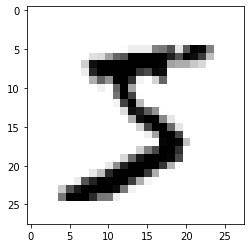

In [6]:
#For Visualisation, use MatPlotLib
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

#CMAP parameter is a colormap instance or registered colormap name.

In [7]:
print(y_train[0])

5


In [8]:
#Normalise

#The x_train values are from 0-255 and hence the graph is dark.
#We can normaise these values to make the values stay in between 0 and 1.

'''
Technical Definition:
Normalise normalises a Numpy Array.

Arguments:
x: Numpy Array to normalise
axis: axiis along which to normalise 
order: Normalization order (eg. order=2 for L2 Form)

Returns:
A normalised copy of that array.
'''

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
#How data looks after Normalisation
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

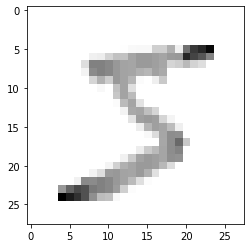

'\nNow the graph is lighter yet the its clearly visible.\nHence we can still train our models with smaller values in dataset resulting in faster processing of the model\n'

In [10]:
#Visualisation after Normalisation
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

'''
Now the graph is lighter yet the its clearly visible.
Hence we can still train our models with smaller values in dataset resulting in faster processing of the model
'''

In [11]:
 #Create model (https://datascience.stackexchange.com/questions/46124/what-do-compile-fit-and-predict-do-in-keras-sequential-models)
 model = tf.keras.models.Sequential()

 #We create sequential model because it is a feed-forward model. The values are going from left to right.

In [12]:
#Input into 1*784
model.add(tf.keras.layers.Flatten())

# To explain what Flatten does, open the link 'https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras'

In [13]:
#Adding few layers
model.add(tf.keras.layers.Dense(128 ,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128 ,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128 ,activation= tf.nn.relu))
#Add Layer that adds a list of inputs. It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
#Dense adds a layer instance on top the layer stack. (https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras). 
#The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [14]:
#Output Layer
model.add(tf.keras.layers.Dense(10 ,activation= tf.nn.softmax))

#Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.
#We use 10 in Dense as we have only 10 possibilities in the output i.e. 0-9.

In [18]:
'''
Let's first see what we need to do when we want to train a model.

First, we want to decide a model architecture, this is the number of hidden layers and activation functions, etc. (compile)
Secondly, we will want to train our model to get all the paramters to the correct value to map our inputs to our outputs. (fit)
Lastly, we will want to use this model to do some feed-forward passes to predict novel inputs. (predict)
'''
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs = 3)
#Epochs is number of times a model is to be run 
#Here, we run the model 3 times on our training set 

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9820
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9870
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9892


In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9709


In [21]:
#Notice accuracy on train set is greater than that of test set.

In [22]:
predictions = model.predict(x_test)

In [24]:
import numpy as np
print(np.argmax(predictions[0]))

7


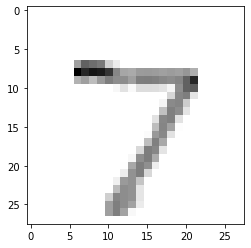

In [25]:
plt.imshow(x_test[0] , cmap=plt.cm.binary)
plt.show()